# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'IG'

In [4]:

df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [6]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,3.927179,3.881751,5.341018,3.860390,4.273431,3.921292
covsal,3.311407,3.276443,4.399565,3.253331,3.278144,3.326063
gbvs,4.230526,4.184416,5.665586,4.217896,4.393630,4.245377
icf,4.050198,4.006282,5.416973,3.954142,4.072085,4.056134
ik,3.646780,3.597596,5.161459,3.545566,3.826508,3.637821
sun,3.628948,3.580300,5.143002,3.472484,3.741193,3.647285


In [7]:
df_f07

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,4.093553,4.056146,5.257730,3.936792,4.354157,4.047661
covsal,1.936030,1.944201,1.681712,2.157660,1.635563,1.986622
gbvs,4.354259,4.313697,5.616645,4.328720,4.457901,4.358135
icf,3.818405,3.775314,5.159526,3.450826,3.596942,3.821658
ik,3.293767,3.245409,4.798791,3.326294,2.760164,3.267753
sun,3.860998,3.825295,4.972187,3.614067,3.957812,3.835837


In [8]:
df_diff_f03 = ((df_f03 - df0) / df0)*100
df_diff_f05 = ((df_f05 - df0) / df0)*100
df_diff_f07 = ((df_f07 - df0) / df0)*100

In [9]:
df_diff_f03

,all,person,no person,animal,sports,electronic
aim,NaN,NaN,NaN,NaN,NaN,NaN
cas,2.563556,2.673213,0.083194,1.716397,1.665408,2.299714
covsal,1.915745,2.150938,-3.535449,7.660711,-0.073854,1.718898
gbvs,1.739846,1.804803,0.246746,1.431318,1.053020,1.612536
icf,0.443046,0.471984,-0.223044,-0.387391,0.063904,0.360733
ik,-3.004782,-3.147936,0.402432,2.076062,-20.611353,-1.248662
sun,4.901578,5.123183,0.100322,3.731357,4.133281,4.514037


In [10]:
df_diff_f03 = calc_means(df_diff_f03)
df_diff_f05 = calc_means(df_diff_f05)
df_diff_f07 = calc_means(df_diff_f07)

In [11]:
df_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cas,4.236465,4.492702,-1.559407,1.979119,1.889007,3.222640,2.376754
covsal,-41.534518,-40.661215,-61.775497,-33.678450,-50.107041,-40.271064,-44.671298
gbvs,2.924770,3.089592,-0.863830,2.627474,1.462833,2.656033,1.982812
icf,-5.722987,-5.765145,-4.752604,-12.728828,-11.668299,-5.780778,-7.736440
ik,-9.680132,-9.789506,-7.026471,-6.184404,-27.867275,-10.172791,-11.786763
sun,6.394425,6.842859,-3.321300,4.077262,5.790085,5.169669,4.158833
mean model,-7.230329,-6.965119,-13.216518,-7.317971,-13.416782,-7.529382,-9.279350


In [12]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,NaN,NaN,NaN
cas,1.833580,2.687914,2.376754
covsal,1.639498,-16.076579,-44.671298
gbvs,1.314711,2.068278,1.982812
icf,0.121539,-0.817410,-7.736440
ik,-4.255706,-6.523185,-11.786763
sun,3.750626,4.892527,4.158833
mean model,0.734041,-2.294743,-9.279350


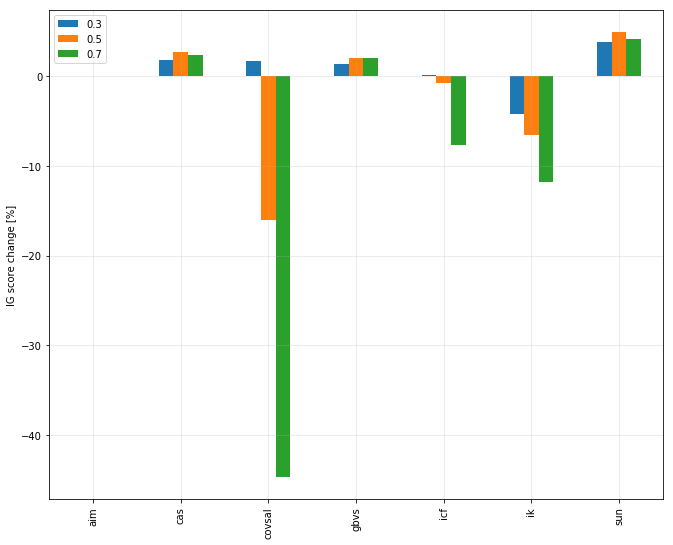

In [13]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [14]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,1.426498,-1.056553,-7.230329
person,1.512697,-0.893419,-6.965119
no person,-0.487633,-4.705700,-13.216518
animal,2.704742,-0.189277,-7.317971
sports,-2.294932,-5.862582,-13.416782
electronic,1.542876,-1.060924,-7.529382
mean context,0.734041,-2.294743,-9.279350


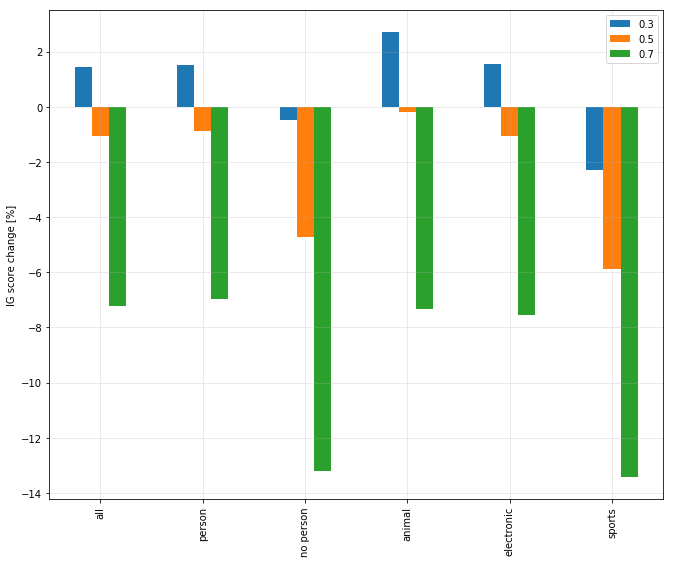

In [15]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)